# Intro to Supervised Learning
## Final Project

### Project Overview

Data: Most Streamed Spotify Songs 2023 [Data Link](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/download?datasetVersionNumber=1)

Some questions about this data are: 
- what patterns exist among the features of the most streamed songs?
- which features are most significant in predicting a song will be popular?
- can a model be build to determine if a song will be popular based on its features?

The primary problem this project will set out to solve is the third: can a model be build to determine if a song will be popular based on its features?

In order to solve this problem, we will have to understand the first two questions. 


### Exploration


First, we'll import the dataset and view the first few rows of data. <br>
Then, we'll take a closer look at the data by looking at the shape, column names, data types, values and column statistics. We'll then check which columns have null values and count how many null values exist.

In [21]:
import pandas as pd 

file = "/Users/alyso/Desktop/spotify-2023.csv"
data = pd.read_csv(file, encoding="latin-1")

data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [24]:
print(data.shape)
print(data.info())

(952, 24)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 952 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    object 
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    object 
 14  bpm                   952 non-null    int64  
 15  key          

In [23]:
data = data[data.track_name != "Love Grows (Where My Rosemary Goes)"]
data['streams'] = data['streams'].astype(float)
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [25]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

There are missing values in the 'in_shazam_charts' and 'key' columns. We'll figure out how to deal with these later. <br><br>
Let's take a look at how some of the data is distributed across the various columns, and if that pattern remains consistent across all songs vs. across only the top 100.

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5


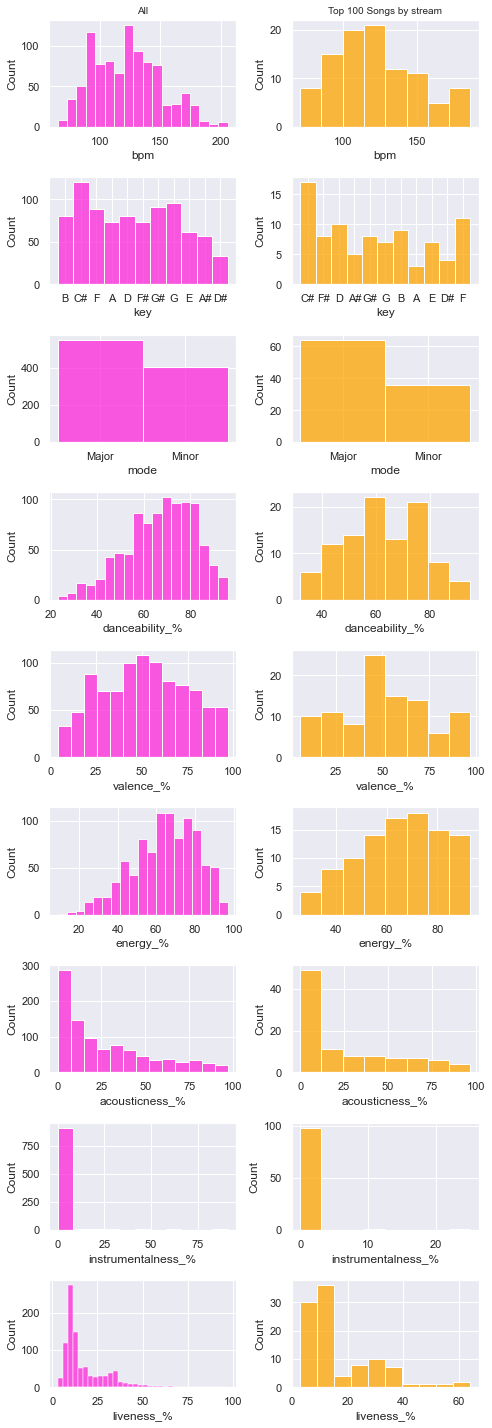

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(palette='spring')

data_top100 = data.sort_values(by = ['streams'], ascending = False).head(100)

cols_plot = ['bpm',
 'key',
 'mode',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']

f, axes = plt.subplots(9, 2, figsize=(7, 20))

for i, col in zip(range(0,9), cols_plot):
    sns.histplot(data_top100, x = col, ax=axes[i,1], color = 'orange')

for i, col in zip(range(0,9), cols_plot):
    sns.histplot(data, x = col, ax=axes[i,0])

for ax, col in zip(axes[0,:], ['All', 'Top 100 Songs by stream']):
    ax.set_title(col, size=10)
    
f.tight_layout()

data_top100.head()

Not all of the patterns are consistent. For example, across all top songs, majority of the songs are in major key whereas across the top 100, majority are in minor key. Most of the other patterns seem consistent between all top songs and the top 100. 

Let's check the correlation between features to determine which features might be useful

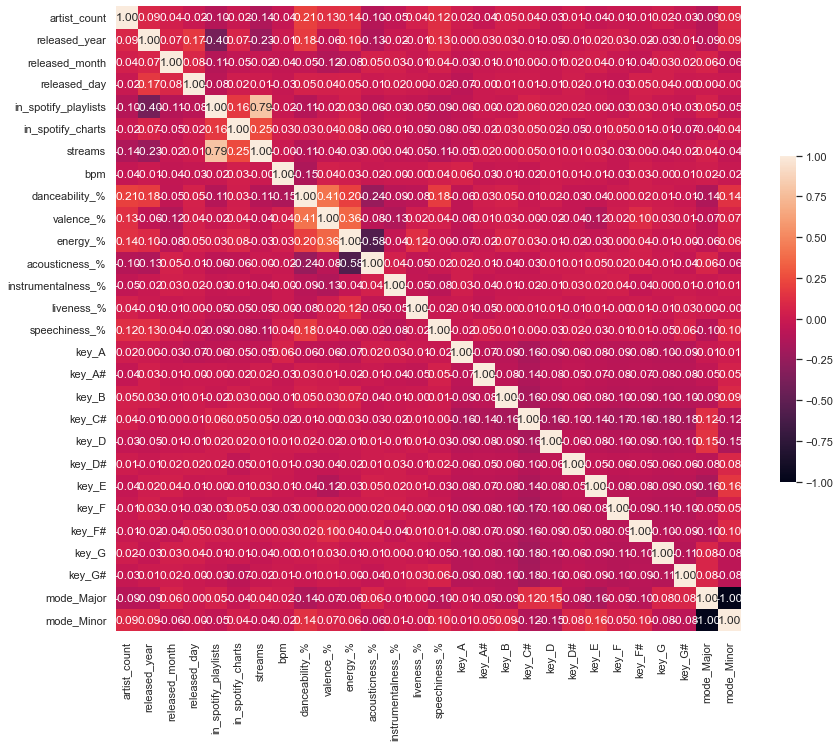

In [41]:
# Correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='rocket', square=True, cbar_kws={"shrink": .5})

# Show the plot
plt.show()

### Cleaning

The top song clearly has an issue. In the streams column, there is a long string instead of a number. Let's delete this row of data.

In [28]:
data[data.track_name=="Love Grows (Where My Rosemary Goes)"].streams.values[0]
# there is a problem with the first row so remove that song

data = data[data.track_name != "Love Grows (Where My Rosemary Goes)"]

IndexError: index 0 is out of bounds for axis 0 with size 0

There are some missing values in the 'key' column. This column does seem to have some importance in predicting popularity, so we don't want to drop it entirely. Instead, we'll fill the NA values with the key that is most common in both all top streamed songs as well as the top 100 - C#

In [29]:
data.fillna('C#', inplace = True)

We are mostly interested in the spotify charts, so some of the other charts are not relevant here. We can drop some of those columns.

In [30]:
data.drop(columns = ['in_apple_playlists',
 'in_apple_charts',
 'in_deezer_playlists',
 'in_deezer_charts',
 'in_shazam_charts'], inplace=True)

Let's encode the 'key' and 'mode' columns so that we can use them.

In [31]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

data = encode_and_bind(data, 'key')
data = encode_and_bind(data, 'mode')

### Linear Regression

Next, we can build a linear regression model based on some of the features.

mean_squared_error :  3.053353271707867e+17
mean_absolute_error :  411760116.6372769
r2_score : 0.02104621935375861


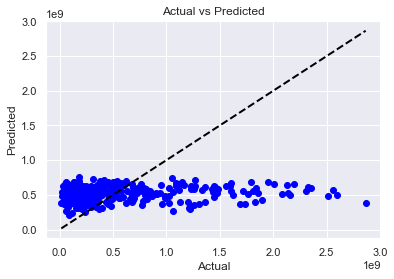

In [38]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing 

y = data['streams']
X = data[['bpm',
 'key_A', 'key_A#', 'key_B',
       'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G',
       'key_G#', 'mode_Major', 'mode_Minor',
 'danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%' ]]

# Normalize the target
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#y_normalized = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

model = LinearRegression()
model.fit(X_train,y_train)

predictions = model.predict(X_test)
print( 
  'mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print( 
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 
print(
  'r2_score :', r2_score(y_test, predictions))


import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

A linear regression model does not work well here at all. This isn't surprising since the features are not linearly related. Maybe we can improve upon this using a decision tree. 

### Decision Tree, Random Forest

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']] = scaler.fit_transform(X_train[['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']])

X_test[['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']] = scaler.transform(X_test[['danceability_%',
 'valence_%',
 'energy_%',
 'acousticness_%',
 'instrumentalness_%',
 'liveness_%',
 'speechiness_%']])

tree_model = DecisionTreeRegressor()
rf_model = RandomForestRegressor()

tree_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)


tree_mse = mean_squared_error(y_train, tree_model.predict(X_train))
tree_mae = mean_absolute_error(y_train, tree_model.predict(X_train))
rf_mse = mean_squared_error(y_train, rf_model.predict(X_train))
rf_mae = mean_absolute_error(y_train, rf_model.predict(X_train))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


from math import sqrt

print("Decision Tree training mse = ",tree_mse," & mae = ",tree_mae," & rmse = ", sqrt(tree_mse))
print("Random Forest training mse = ",rf_mse," & mae = ",rf_mae," & rmse = ", sqrt(rf_mse))

c:\Users\alyso\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
c:\Users\alyso\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\alyso\AppData\Local\Temp/ipykernel_4800/875260703.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel(

Decision Tree training mse =  0.0  & mae =  0.0  & rmse =  0.0
Random Forest training mse =  0.0034531586946030925  & mae =  0.04291456664272159  & rmse =  0.058763583064710176


In [34]:
tree_test_mse = mean_squared_error(y_test, tree_model.predict(X_test))
tree_test_mae = mean_absolute_error(y_test, tree_model.predict(X_test))
rf_test_mse = mean_squared_error(y_test, rf_model.predict(X_test))
rf_test_mae = mean_absolute_error(y_test, rf_model.predict(X_test))

print("Decision Tree test mse = ",tree_test_mse," & mae = ",tree_test_mae," & rmse = ", sqrt(tree_test_mse))
print("Random Forest test mse = ",rf_test_mse," & mae = ",rf_test_mae," & rmse = ", sqrt(rf_test_mse))

Decision Tree test mse =  0.049148873249189186  & mae =  0.1494445308737565  & rmse =  0.22169545157532933
Random Forest test mse =  0.023846587031924858  & mae =  0.11659426355051591  & rmse =  0.15442340182732944


### Results, Discussion, Next Steps

The results of the decision tree and the random forest are about as expected. A common issue with decision trees is that they over-fit the training data and perform poorly on the test data. This is seen here, as we have a perfect fit for the training data but a poor performance on the test data. Random forests are a way to overcome this limitation. As seen here, the random forest performs better on the test data than the decision tree does. 

One of the major influences to the model is the features I chose to use. It is possible that performing more feature engineering would allow for more informative features and would yield a better model. Some ideas include:
- combining "released_year", "released_month", and "released_day" into one variable called "released_date"
- combining "in_apple_playlists", "in_deezer_playlists", and "in_spotify_playlists" into one variable called "in_playlists"
- combining "in_apple_charts", "in_deezer_charts", "in_shazam_charts", and "in_spotify_charts" into one variable called "in_charts"


Since what makes music popular is a fairly complicated question, ensemble methods and deep learning methods could be applied to find more pattersn within the data and create better models for predicting a song's popularity.